In [4]:
import pandas as pd
import numpy as np

In [5]:
playstore = pd.read_csv('playstore-analysis.csv')
playstore.shape


(10841, 13)

In [6]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Drop records where rating is missing since rating is our target/study variable
# data = playstore.set_index("Rating")
# playstore = data.dropna()
# playstore.shape
indexNames = playstore[ (playstore['Rating'] =='') ].index
playstore.drop(indexNames , inplace=True)
playstore



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
#Check the null values for the Android Ver column.
data = pd.DataFrame(playstore['Android Ver'])
data.isnull().sum()



Android Ver    3
dtype: int64

In [9]:
#Current ver – replace with most common value
from statistics import mode

data = pd.DataFrame(playstore['Current Ver'])
playstorea = playstore.fillna(mode(data))
playstorea



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,Current Ver,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [10]:
#Data clean up – correcting the data types
# a. Which all variables need to be brought to numeric types?
playstore.dtypes



App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [24]:
# b. Price variable – remove $ sign and convert to float

playstore['Price'] = playstore['Price'].map(lambda x: x.replace('$',''))
playstore['Price'] = playstore['Price'].map(lambda x: x.rstrip('M'))

convert_dict = {'Reviews':float,'Price':float}  
playstore = playstore.astype(convert_dict) 
playstore


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4.0,64000.000000,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,NaN,2.0,238.000000,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2.0,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,NaN,11.0,2000.000000,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9096,DZ Puzzle,FAMILY,NaN,14.0,47000.000000,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


In [25]:
#Installs – remove ‘,’ and ‘+’ sign, convert to integer
playstore['Installs'] = playstore['Installs'].map(lambda x: x.replace(',',''))
playstore['Installs'] = playstore['Installs'].map(lambda x: x.replace('+',''))
convert_dict = {'Installs':int,'Reviews':int} 
playstore = playstore.astype(convert_dict) 
print(playstore.dtypes)


AttributeError: 'int' object has no attribute 'replace'

In [26]:
#Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
#i. Are there any such records? Drop if so.

indexNames = playstore[ (playstore['Rating'] < 1) & (playstore['Rating'] > 5) ].index
playstore.drop(indexNames , inplace=True)
playstore


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4.0,64000.000000,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,NaN,2.0,238.000000,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2.0,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,NaN,11.0,2000.000000,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9096,DZ Puzzle,FAMILY,NaN,14.0,47000.000000,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


In [27]:
# Reviews should not be more than installs as only those who installed can review the app.
# i. Are there any such records? Drop if so

indexNames = playstore[ (playstore['Reviews'] <= playstore['Installs'])].index
playstore.drop(indexNames , inplace=True)
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4.0,64000.000000,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,NaN,2.0,238.000000,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2.0,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,NaN,11.0,2000.000000,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9096,DZ Puzzle,FAMILY,NaN,14.0,47000.000000,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


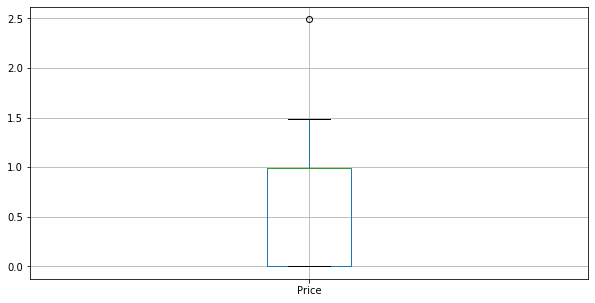

In [28]:
#4. Identify and handle outliers – 
# a. Price column
# i. Make suitable plot to identify outliers in price

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
boxplot = playstore.boxplot(column=['Price'])



In [41]:
# iii. After dropping the useless records, make the suitable plot again to identify outliers
playstore['Price'] = playstore['Price'].map(lambda x: x>2.5)

playstore.drop(playstore[playstore['Price']])

playstore

SyntaxError: unexpected character after line continuation character (<ipython-input-41-be4d7c71e420>, line 4)

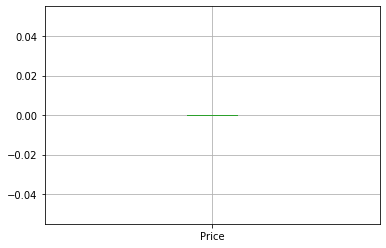

In [46]:
boxplot = playstore.boxplot(column=['Price'])

In [ ]:
# ii. Do you expect apps on the play store to cost $200? Check out these cases


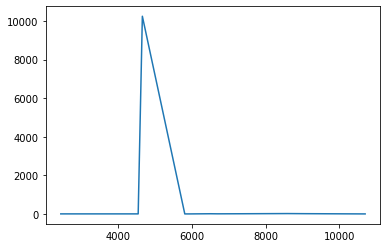

In [81]:
# b. Reviews column
# i. Make suitable plot
bars = pd.DataFrame(playstore['Reviews'])
plt.plot(bars)
plt.show()

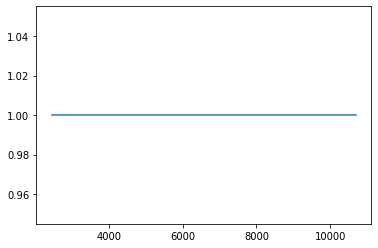

In [90]:
# ii. Limit data to apps with < 1 Million reviews

bars = pd.DataFrame(playstore['Reviews']<100000)
plt.plot(bars)
plt.show()

In [99]:
# c. Installs
# i. What is the 95th percentile of the installs?
# ii. Drop records having a value more than the 95th percentile
bars = pd.DataFrame(playstore['Installs'])

bars.quantile([.95], axis = 0) 


,Installs
0.95,5005.0


In [105]:
bars.quantile([.96], axis = 0) 

playstore.drop(playstore['Installs'] >bars.quantile([.95]) )


KeyError: "['Installs'] not found in axis"

In [133]:
# Data analysis to answer business questions
# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower
# values?
import seaborn as sns


11

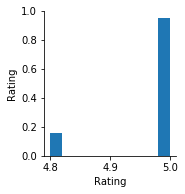

In [161]:
data = pd.DataFrame(playstore['Rating'])
Rating_data = sns.pairplot(data)
data.size

In [157]:
# What are the top Content Rating values?
# a. Are there any values with very few records?
data = pd.DataFrame(playstore['Content Rating'])
# Rating_data = sns.pairplot(data)
# Ratind_Data
data.max(axis=0)


11

In [164]:
# b. If yes, drop those as they won’t help in the analysis


data = playstore.set_index(playstore['Content Rating'])
dataT = data.drop("Teen", axis=0)
dataT


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,,
Everyone,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.000000,1,Free,False,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
Everyone,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4.0,64000.000000,1,Free,False,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
Everyone,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000,Paid,False,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
Everyone,AX Watch for WatchMaker,PERSONALIZATION,NaN,2.0,238.000000,1,Paid,False,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
Everyone,Ra Ga Ba,GAME,5.0,2.0,20000.000000,1,Paid,False,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
Everyone,Sam.BN Pro,TOOLS,NaN,11.0,2000.000000,10,Paid,False,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
Everyone,Brick Breaker BR,GAME,5.0,7.0,19000.000000,5,Free,False,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
Everyone,Trovami se ci riesci,GAME,5.0,11.0,6100.000000,10,Free,False,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
Everyone,DZ Puzzle,FAMILY,NaN,14.0,47000.000000,10,Paid,False,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


In [156]:
data.size

130

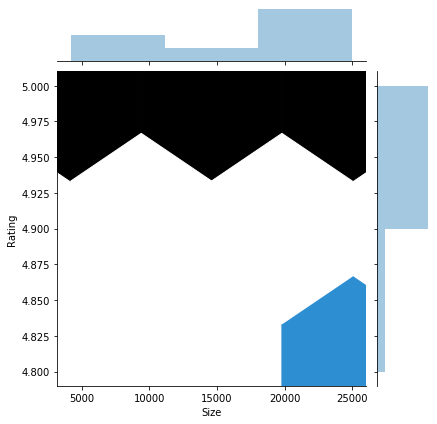

In [177]:
# Effect of size on rating
# a. Make a joinplot to understand the effect of size on rating
# b. Do you see any patterns?
Size = playstore.set_index(playstore['Size'])
Rating = playstore.set_index(playstore['Rating'])

g = sns.jointplot(x='Size', y='Rating', data=Rating,kind='hex')


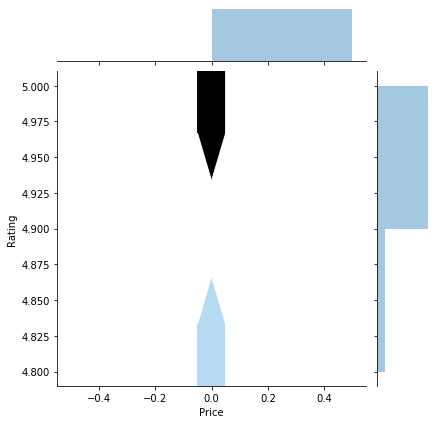

In [180]:
# Effect of price on rating
# a. Make a jointplot (with regression line)
# b. What pattern do you see?
# c. How do you explain the pattern?


Price = playstore.set_index(playstore['Price'])
Rating = playstore.set_index(playstore['Rating'])

g = sns.jointplot(x='Price', y='Rating', data=Rating,kind='hex')


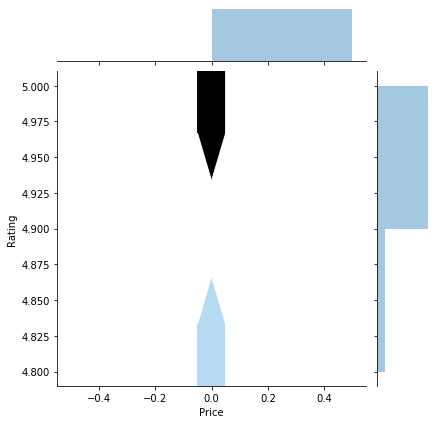

In [185]:
# d. Replot the data, this time with only records with price > 0
# e. Does the pattern change?
# f. What is your overall inference on the effect of price on the rating
Price = playstore.set_index(playstore['Price']>0)
Rating = playstore.set_index(playstore['Rating'])

g = sns.jointplot(x='Price', y='Rating', data=Rating,kind='hex')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


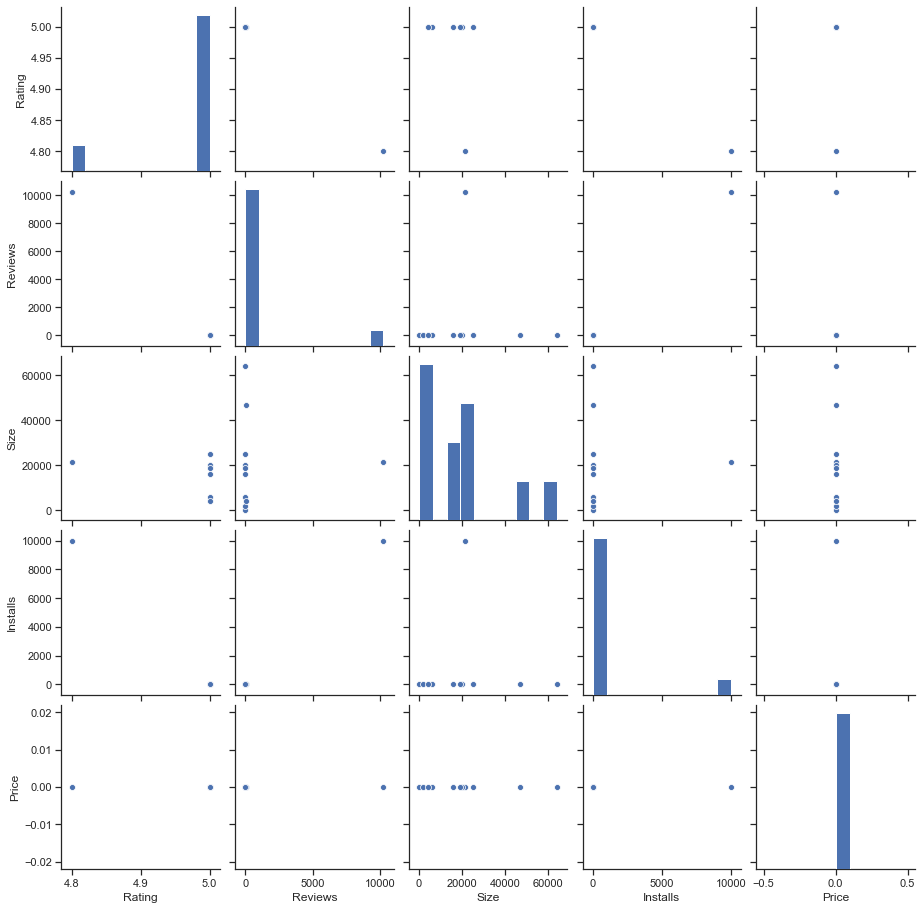

In [201]:
# Look at all the numeric interactions together –
# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'
dataframe = pd.DataFrame(columns=('Reviews', 'Size', 'Rating', 'Price'))



sns.pairplot(playstore)
sns.set(style="ticks", color_codes=True)